In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')

In [7]:
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [9]:
df = df.drop(columns='RiskLevel',axis=1)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


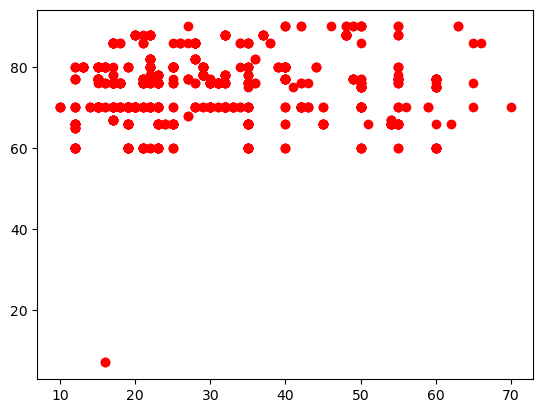

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'],df['HeartRate'],color='red')

In [13]:
from sklearn.ensemble import IsolationForest

In [15]:
clf = IsolationForest(contamination=0.1)
clf.fit(df)
predictions = clf.predict(df)

In [17]:
predictions

array([ 1,  1,  1, ..., -1,  1,  1])

In [19]:
import numpy as np
abn_ind = np.where(predictions<0)
abn_ind

(array([   7,   20,   35,   91,  105,  108,  110,  111,  114,  117,  123,
         127,  130,  135,  137,  166,  180,  181,  182,  191,  210,  232,
         262,  275,  276,  277,  278,  287,  317,  319,  326,  337,  338,
         339,  340,  341,  362,  370,  371,  372,  373,  382,  413,  417,
         419,  422,  426,  428,  432,  435,  442,  458,  471,  482,  486,
         499,  502,  506,  535,  538,  552,  553,  554,  563,  583,  597,
         599,  603,  612,  613,  631,  640,  644,  658,  670,  679,  683,
         689,  772,  787,  818,  834,  849,  908,  928,  940,  948,  955,
         961,  967,  968,  970,  976,  982,  994, 1000, 1001, 1002, 1005,
        1010, 1011], dtype=int64),)

In [21]:
X = df.values

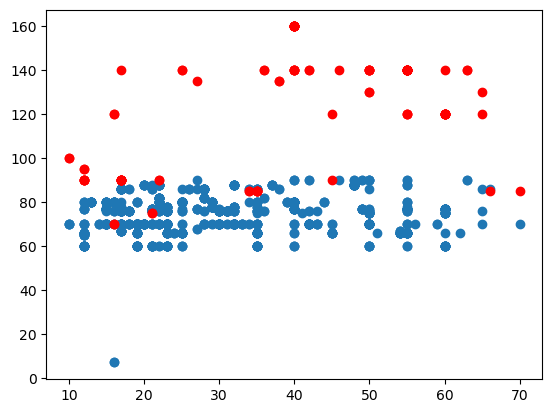

In [23]:
abn_ind = np.where(predictions<0)
plt.scatter(df['Age'],df['HeartRate'])
plt.scatter(X[abn_ind,0],X[abn_ind,1],color='red')

## DBSCAN

In [56]:
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=750,noise=0.1,factor=0.3)
X

array([[-0.11451068,  0.02764066],
       [-0.91187408, -0.4292332 ],
       [ 0.57234884,  1.13009557],
       ...,
       [ 0.02389143,  0.35833559],
       [ 0.22314498, -0.11305191],
       [ 1.08846606,  0.17872756]])

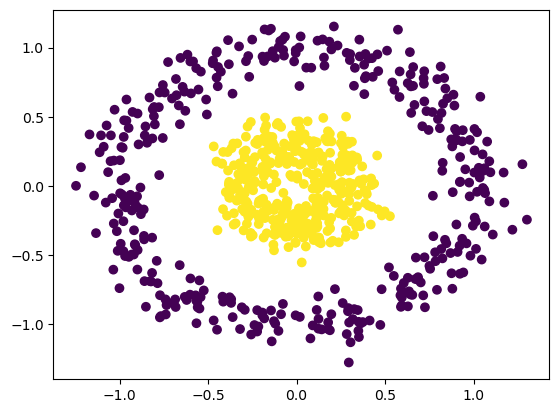

In [58]:
plt.scatter(X[:,0],X[:,1],c=y)

In [62]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.10)
dbscan.fit_predict(X)

array([ 0,  1, -1,  2,  0,  3,  0,  4,  0,  0,  4,  0,  1,  0,  1,  5, -1,
        0,  0,  0,  0,  1,  0,  1, -1,  4,  0,  3, -1,  3,  4,  0,  2,  0,
        0,  0,  0,  2,  5,  3,  0,  0, 11,  0,  0,  0,  3,  0,  4,  0,  6,
        6,  7,  6, -1,  0,  0,  3,  6,  0,  0,  3,  0,  0,  1,  5,  0,  0,
        9,  8,  0,  8,  0,  9,  0,  0, -1,  2,  3,  0,  0,  0,  0,  1,  0,
       -1,  3,  2,  6, 10,  0,  2,  1, -1,  4,  4,  4,  4,  0,  3,  0,  9,
        2,  0,  4,  6,  0,  0,  0,  0,  0,  7, 10,  3,  0,  0,  0,  0,  0,
        0,  4,  8,  9,  5,  0,  2,  4,  0,  0,  0,  4,  0,  0,  0,  0,  0,
        0,  8,  0,  9,  6,  0,  3,  8,  9,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  5,  8,  0, -1,  8,  0, 10, 10,  1,  0,  4,  0,  7,  0,
        0,  0,  0,  0,  6,  0,  0, 10, 11, 11,  0,  0,  0, 10, -1,  1,  3,
        9,  0,  4,  3,  0, -1,  2,  0,  0,  2,  0,  0,  0,  1, 11,  4,  0,
        4,  0,  4,  3,  0, 10,  0,  7,  0,  0,  3,  4,  0,  3,  0,  0, -1,
        0,  0,  0,  2,  1

In [43]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  2,  5,  2,  0,  0,  0,  4,
        0,  0,  9,  0,  3,  0,  0,  4,  0,  5,  5,  0,  6,  0,  5,  5,  0,
        7,  0, -1,  0,  5,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  5,
        5,  8,  9,  2,  0,  0,  0,  0,  9,  0,  0,  1, -1,  0,  0,  4,  0,
        5,  5,  0,  0,  6,  0,  0,  1,  1,  0,  0,  5,  0,  2,  2,  1,  5,
       12,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  3,  5,  0,  0,  0,
        0,  5,  5,  0,  5,  0,  5,  5, 10,  5,  2,  9,  2,  1,  0,  0, 11,
        5, -1,  1,  6,  8,  9,  0,  9,  8,  0,  0,  4,  7,  5,  2,  0,  0,
        6,  5, 11,  0,  0,  8,  9,  5, -1,  5, -1,  0,  0,  9,  0,  6,  2,
        3,  2,  0,  0, 12,  0,  3,  0,  5,  6,  0,  0,  5,  1,  0,  5,  1,
        8,  5,  9,  1,  0, 12,  0,  4,  3,  0,  8,  0,  0,  8,  5,  8, -1,
        0,  6,  4,  6,  4,  0,  0, -1, 12,  0,  0,  5,  5,  6,  0,  0,  0,
        0,  8,  0,  2,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  2,  0,
        0,  5, -1,  0,  0

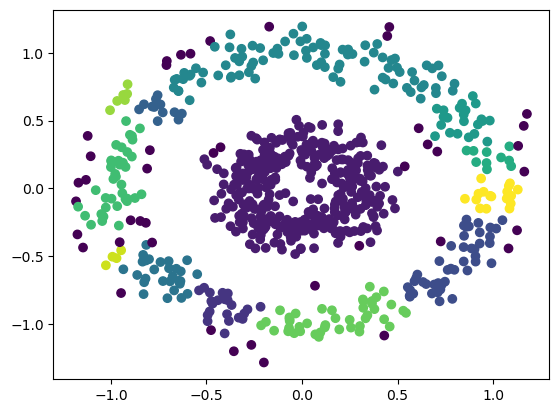

In [45]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

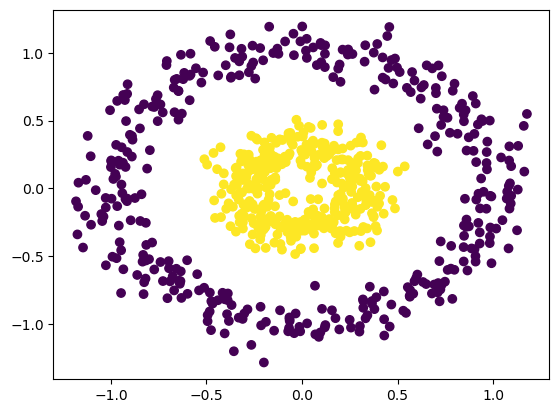

In [47]:
plt.scatter(X[:,0],X[:,1],c=y)

## Local outlier factor 
There are two types of outliers:
1. Local outliers
2. Global outliers

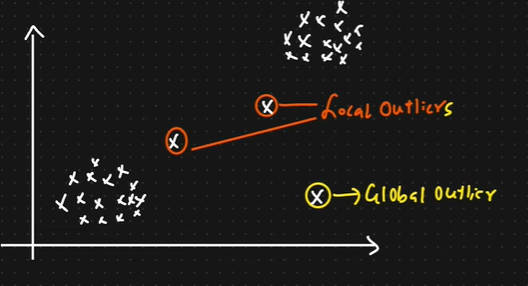

**Local outlier factor with the help of K-Nearest Neighbors calculates the local density of a given point.** 

**If the local density is low, the point is a local outlier.**

## Local outlier factors

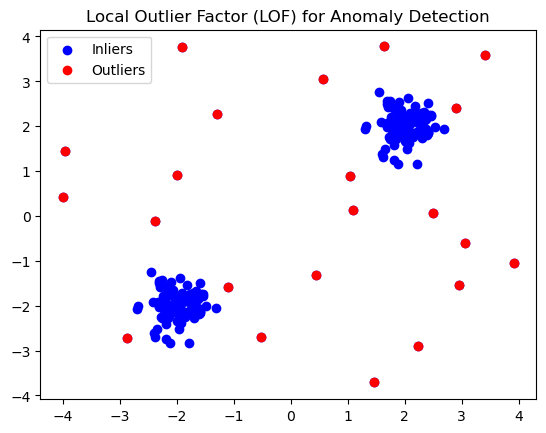

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate random data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine inliers and outliers
X = np.r_[X_inliers, X_outliers]

# Fit the LOF model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)

# Plotting
plt.title("Local Outlier Factor (LOF) for Anomaly Detection")
plt.scatter(X[:, 0], X[:, 1], color='b', label="Inliers")
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], color='r', label="Outliers")
plt.legend()
plt.show()

### Isolation Tree

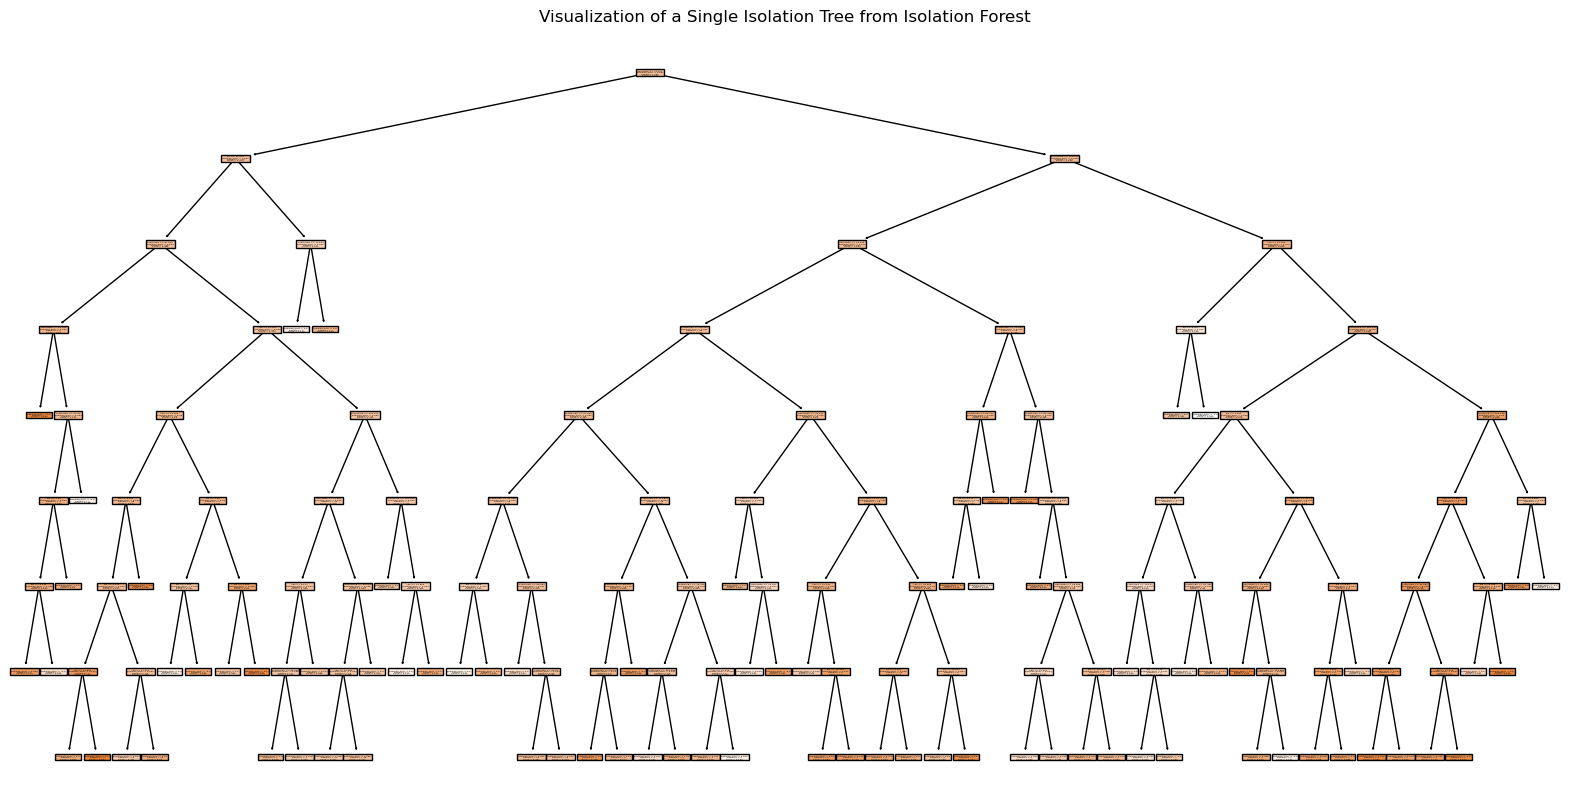

In [65]:
from sklearn.ensemble import IsolationForest
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv('Maternal Health Risk Data Set.csv')

# Selecting relevant features (update as needed based on your dataset)
features = data.select_dtypes(include=[np.number])

# Train Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(features)

# Extract a single tree from the Isolation Forest
single_tree = model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(single_tree, feature_names=features.columns, filled=True)
plt.title('Visualization of a Single Isolation Tree from Isolation Forest')
plt.show()
